In [1]:
import pandas as pd
from utils import load_data

# EDA for MSFT Historical Data

In [2]:
# Load the data
df = load_data('MSFT_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  9672.000000  9672.000000  9672.000000  9672.000000  9672.000000   
mean     58.402199    59.003071    57.784759    58.417683    52.719365   
std      90.122302    90.958645    89.232546    90.146786    90.066461   
min       0.088542     0.092014     0.088542     0.090278     0.055665   
25%       5.695313     5.770508     5.617188     5.695313     3.511695   
50%      27.304999    27.600000    27.085000    27.341875    19.145540   
75%      46.687500    47.099998    46.138672    46.657187    38.339042   
max     467.000000   468.350006   464.459991   467.559998   466.718781   

             Volume    Dividends  Stock Splits  
count  9.672000e+03  9672.000000   9672.000000  
mean   5.677678e+07     0.002982      0.001758  
std    3.814123e+07     0.046524      0.057944  
min    2.304000e+06     0.000000      0.000000  
25%    3.206982e+07     0.000000      0.000000  
50%    4.990225e+0

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on MSFT historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
9667,428.899994,451.887498,438.804000,36.980921,-0.684986,3.013510,-3.698496
9668,418.399994,450.199498,438.897599,31.696381,-2.740453,1.862718,-4.603171
9669,425.269989,448.820497,439.071799,37.944660,-3.771598,0.735855,-4.507452
9670,426.730011,447.809497,439.144800,39.217239,-4.420024,-0.295321,-4.124703
9671,422.920013,446.118997,439.183400,37.080269,-5.181612,-1.272579,-3.909033


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on MSFT price trends.

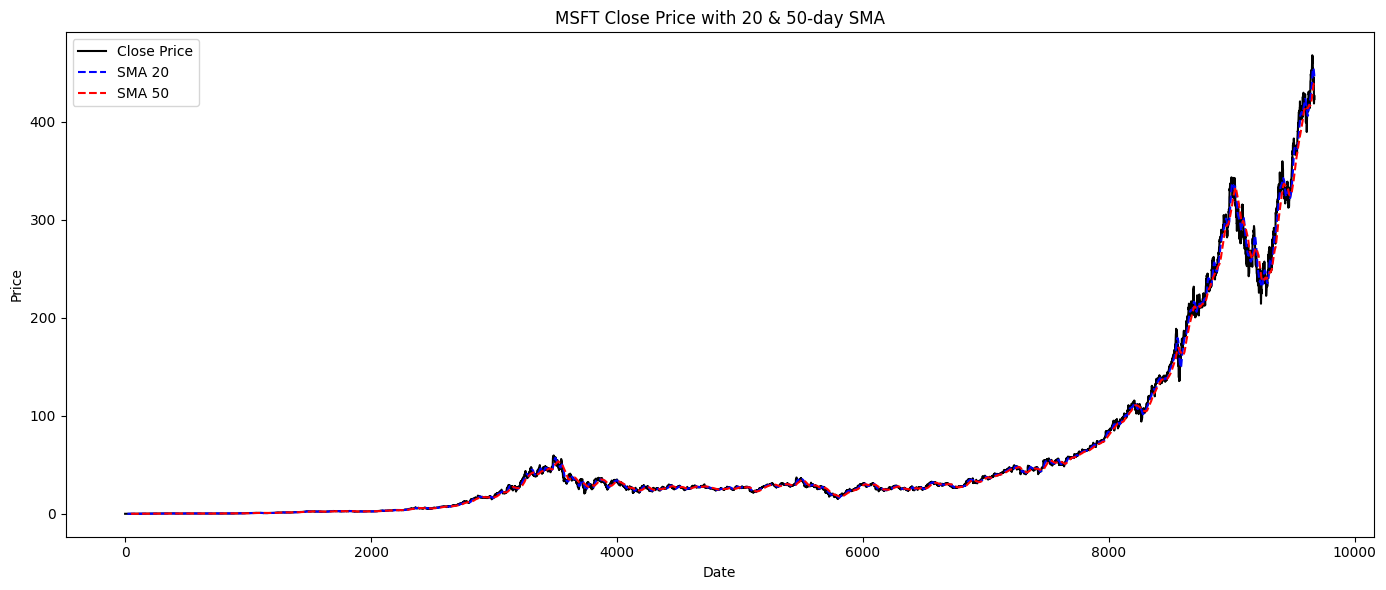

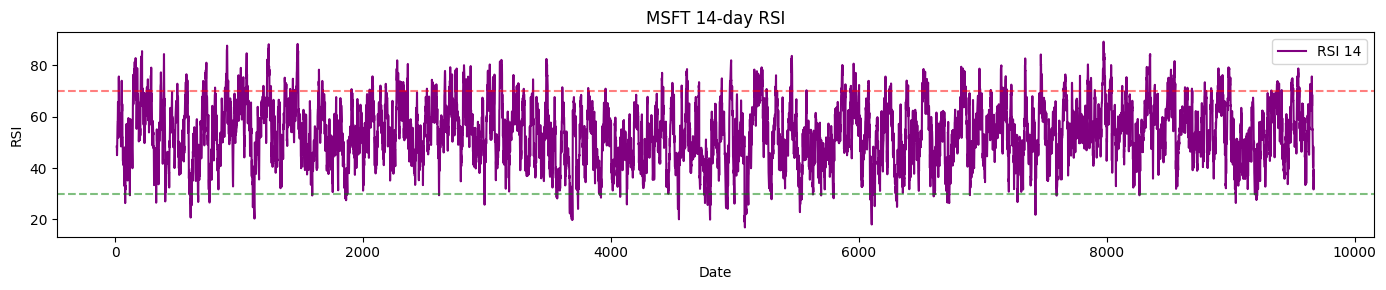

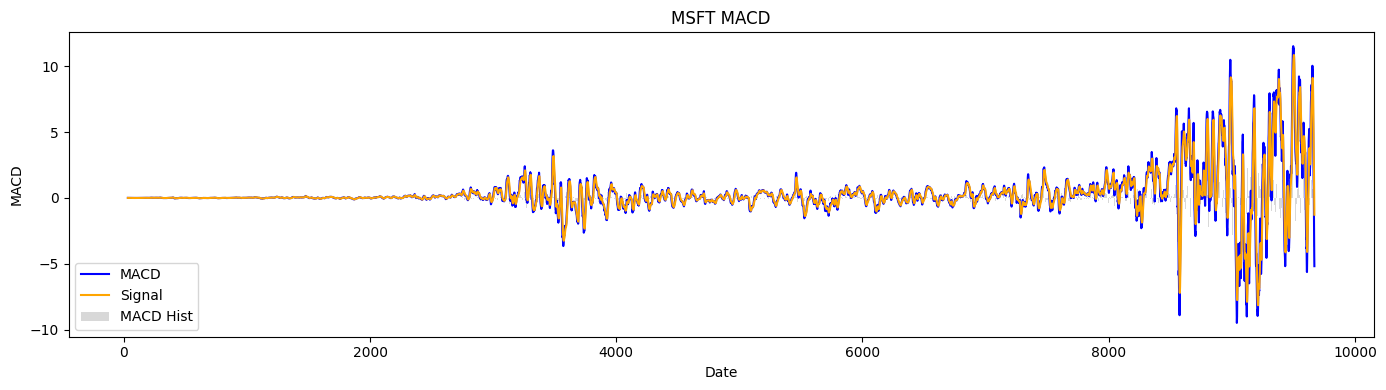

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('MSFT Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('MSFT 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('MSFT MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()